# Exploring Data

In [ ]:
import pandas as pd


df_ratings = pd.read_csv('../data/interactions_small.csv')
df_meta = pd.read_csv('../data/books_metadata_large.csv')

## Check Ratings

In [2]:
df_ratings.head()

,user_id,book_id,is_read,rating
0,8842281e1d1347389f2ab93d60773d4d,1384,True,4
1,8842281e1d1347389f2ab93d60773d4d,1376,True,4
2,8842281e1d1347389f2ab93d60773d4d,30119,True,5
3,72fb0d0087d28c832f15776b0d936598,24769928,False,0
4,72fb0d0087d28c832f15776b0d936598,30119,True,3


Check the rating scale

In [3]:
df_ratings.rating.unique()

array([4, 5, 0, 3, 2, 1])

No missing row in ratings

In [4]:
df_ratings.count()

user_id    2734350
book_id    2734350
is_read    2734350
rating     2734350
dtype: int64

Text(0, 0.5, 'Count')

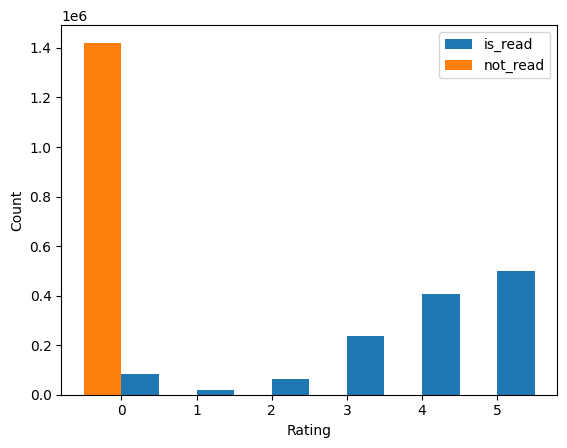

In [5]:
from matplotlib import pyplot as plt


ratings = df_ratings.groupby(['is_read', 'rating']).rating.count()
read_ratings = ratings.loc[True]
not_read_ratings = ratings.loc[False]

plt.bar(read_ratings.index + 0.25, read_ratings, label='is_read', width=0.5)
plt.bar(not_read_ratings.index - 0.25, not_read_ratings, label='not_read', width=0.5)
plt.legend()
plt.xlabel('Rating')
plt.ylabel('Count')

According to the data source (www.goodreads.com), the rating scale is from 1 - 5, so the 0 means the user haven't rated the item.

## Check Books

In [6]:
df_meta.head()

,isbn,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,...,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series
0,NaN,1,[],US,eng,"[{'count': '8', 'name': 'to-read'}, {'count': ...",NaN,False,3.83,NaN,...,11.0,NaN,1887.0,https://www.goodreads.com/book/show/16037549-v...,https://images.gr-assets.com/books/1348176637m...,16037549,3,5212748,Vision of Sir Launfal and Other Poems,Vision of Sir Launfal and Other Poems
1,0811223981,2,[],US,NaN,"[{'count': '100', 'name': 'to-read'}, {'count'...",NaN,False,3.83,B00U2WY9U8,...,4.0,NaN,2015.0,https://www.goodreads.com/book/show/22466716-f...,https://images.gr-assets.com/books/1404958407m...,22466716,37,41905435,Fairy Tales: Dramolettes,Fairy Tales: Dramolettes
2,0374428115,7,[],US,NaN,"[{'count': '32', 'name': 'to-read'}, {'count':...",NaN,False,4.38,NaN,...,7.0,NaN,2008.0,https://www.goodreads.com/book/show/926662.Gro...,https://s.gr-assets.com/assets/nophoto/book/11...,926662,45,911665,Growltiger's Last Stand and Other Poems,Growltiger's Last Stand and Other Poems
3,0156182890,12,[],US,NaN,"[{'count': '554', 'name': 'to-read'}, {'count'...",NaN,False,3.71,B00IWTRB1W,...,3.0,NaN,1964.0,https://www.goodreads.com/book/show/926667.The...,https://images.gr-assets.com/books/1382939971m...,926667,115,995066,The Cocktail Party,The Cocktail Party
4,1942004192,4,[],US,eng,"[{'count': '228', 'name': 'to-read'}, {'count'...",NaN,False,5.00,NaN,...,12.0,First,2015.0,https://www.goodreads.com/book/show/29065952-l...,https://images.gr-assets.com/books/1455198396m...,29065952,9,49294781,Louder Than Everything You Love,Louder Than Everything You Love


In [7]:
df_meta.count()

isbn                    26534
text_reviews_count      36514
series                  36514
country_code            36514
language_code           17052
popular_shelves         36514
asin                     1870
is_ebook                36514
average_rating          36514
kindle_asin              9635
similar_books           36514
description             28988
format                  29489
link                    36514
authors                 36514
publisher               30481
num_pages               29009
publication_day         21558
isbn13                  28359
publication_month       23494
edition_information      3425
publication_year        30698
url                     36514
image_url               36514
book_id                 36514
ratings_count           36514
work_id                 36514
title                   36512
title_without_series    36512
dtype: int64

Text(0, 0.5, 'Count')

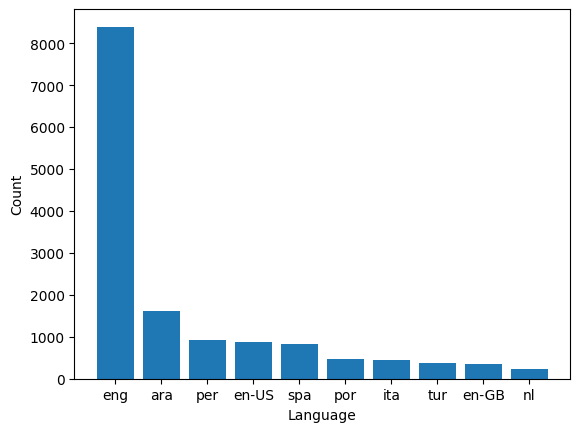

In [8]:
from matplotlib import pyplot as plt

langs = df_meta.groupby('language_code')['language_code'].count()
langs = langs.sort_values(ascending=False).iloc[:10]
plt.bar(langs.index, langs)
plt.xlabel("Language")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

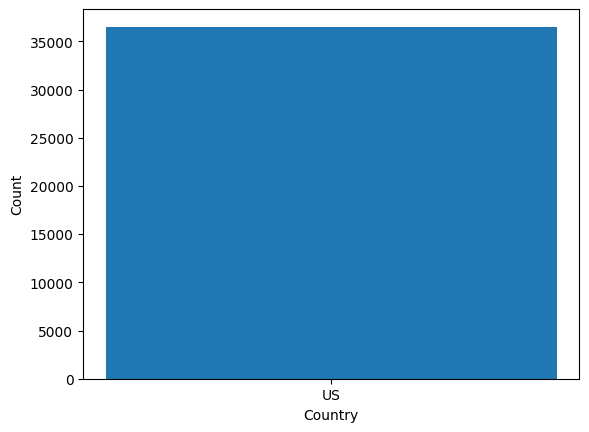

In [9]:
couns = df_meta.groupby('country_code')['country_code'].count()
couns = couns.sort_values(ascending=False).iloc[:10]
plt.bar(couns.index, couns)
plt.xlabel("Country")
plt.ylabel("Count")

## Data Cleaning

Drop unread ratings

In [10]:
df_ratings = df_ratings[df_ratings.is_read]
print(len(df_ratings))

1313610


Only keep English books since our language model is based on English.

In [28]:
df_meta = df_meta[df_meta.language_code.str[:3].isin({'eng', 'en-'})]
print(len(df_meta))

9643


In [29]:
df_books = df_meta[['book_id', 'title', 'popular_shelves', 'series', 'authors',
                    'description', 'image_url', 'url', 'publication_year', 'is_ebook']]
df_books.columns = ['id', 'title', 'popular_shelves', 'series', 'authors',
                    'description', 'image_url', 'url', 'publication_year', 'is_ebook']
df_books.head()

,id,title,popular_shelves,series,authors,description,image_url,url,publication_year,is_ebook
0,16037549,Vision of Sir Launfal and Other Poems,"[{'count': '8', 'name': 'to-read'}, {'count': ...",[],"[{'author_id': '15585', 'role': ''}]",Number 30 in a series of literary pamphlets pu...,https://images.gr-assets.com/books/1348176637m...,https://www.goodreads.com/book/show/16037549-v...,1887.0,False
4,29065952,Louder Than Everything You Love,"[{'count': '228', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '14308759', 'role': ''}]",Louder Than Everything You Love is about trans...,https://images.gr-assets.com/books/1455198396m...,https://www.goodreads.com/book/show/29065952-l...,2015.0,False
6,15861988,Into Temptation,"[{'count': '5', 'name': 'to-read'}, {'count': ...",[],"[{'author_id': '2988946', 'role': ''}]",Into Temptation is the debut collection of poe...,https://images.gr-assets.com/books/1346225281m...,https://www.goodreads.com/book/show/15861988-i...,2009.0,False
10,24849837,Naked Soul: The Erotic Love Poems,"[{'count': '853', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '13260036', 'role': ''}]","""Erotic poetry that evokes feelings of joy, ha...",https://images.gr-assets.com/books/1423580531m...,https://www.goodreads.com/book/show/24849837-n...,2015.0,False
17,17729612,The More Loving One,"[{'count': '206', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '14002590', 'role': ''}]",Free online poetry.\nFrom Random House's Boldt...,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/17729612-t...,2000.0,True


In [30]:
df_books.count()

id                  9643
title               9642
popular_shelves     9643
series              9643
authors             9643
description         8220
image_url           9643
url                 9643
publication_year    8476
is_ebook            9643
dtype: int64

In [31]:
df_books.description.fillna('', inplace=True)
df_books.dropna(inplace=True)
df_books.popular_shelves = df_books.popular_shelves.apply(eval)
df_books.series = df_books.series.apply(eval)
df_books.authors = df_books.authors.apply(eval)
df_books.head()

/tmp/ipykernel_940897/297839107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books.description.fillna('', inplace=True)
/tmp/ipykernel_940897/297839107.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books.dropna(inplace=True)
/tmp/ipykernel_940897/297839107.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books.popular_shelves = df_books.popular_shelves.ap

,id,title,popular_shelves,series,authors,description,image_url,url,publication_year,is_ebook
0,16037549,Vision of Sir Launfal and Other Poems,"[{'count': '8', 'name': 'to-read'}, {'count': ...",[],"[{'author_id': '15585', 'role': ''}]",Number 30 in a series of literary pamphlets pu...,https://images.gr-assets.com/books/1348176637m...,https://www.goodreads.com/book/show/16037549-v...,1887.0,False
4,29065952,Louder Than Everything You Love,"[{'count': '228', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '14308759', 'role': ''}]",Louder Than Everything You Love is about trans...,https://images.gr-assets.com/books/1455198396m...,https://www.goodreads.com/book/show/29065952-l...,2015.0,False
6,15861988,Into Temptation,"[{'count': '5', 'name': 'to-read'}, {'count': ...",[],"[{'author_id': '2988946', 'role': ''}]",Into Temptation is the debut collection of poe...,https://images.gr-assets.com/books/1346225281m...,https://www.goodreads.com/book/show/15861988-i...,2009.0,False
10,24849837,Naked Soul: The Erotic Love Poems,"[{'count': '853', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '13260036', 'role': ''}]","""Erotic poetry that evokes feelings of joy, ha...",https://images.gr-assets.com/books/1423580531m...,https://www.goodreads.com/book/show/24849837-n...,2015.0,False
17,17729612,The More Loving One,"[{'count': '206', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '14002590', 'role': ''}]",Free online poetry.\nFrom Random House's Boldt...,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/17729612-t...,2000.0,True


In [34]:
df_ratings = df_ratings[df_ratings.book_id.isin(df_books.id)]
print(len(df_ratings))

1476477


In [35]:
user_idx = {y: x for x, y in enumerate(df_ratings.user_id.unique())}
df_ratings.user_id = df_ratings.user_id.apply(user_idx.get)

/tmp/ipykernel_940897/720008988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings.user_id = df_ratings.user_id.apply(user_idx.get)


In [36]:
df_ratings

,user_id,book_id,is_read,rating
0,0,1384,True,4
1,0,1376,True,4
2,0,30119,True,5
3,1,24769928,False,0
4,1,30119,True,3
...,...,...,...,...
2734321,315601,1381,True,5
2734322,315602,25144676,False,0
2734323,315602,25330489,False,0
2734339,315603,291,False,0


In [38]:
import numpy as np

users = df_ratings.user_id.unique().reshape(-1, 1)
df_users = pd.DataFrame(np.c_[users, users], columns=['id', 'name'])
df_users

,id,name
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
315599,315599,315599
315600,315600,315600
315601,315601,315601
315602,315602,315602


## Store into Database

In [2]:
import sqlalchemy

engine = sqlalchemy.create_engine('sqlite:////home/anthony/code/recom-system/instance/data.db')

In [42]:
with engine.connect() as conn:
    df_ratings.to_sql('ratings', conn, index=False, if_exists='append')

In [44]:
import json
for col in ['popular_shelves', 'series', 'authors']:
    df_books[col] = df_books[col].apply(json.dumps)
with engine.connect() as conn:
    df_books.to_sql('books', conn, index=False, if_exists='append')

/tmp/ipykernel_940897/3441749730.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_books[col] = df_books[col].apply(json.dumps)


In [45]:
users = df_ratings.user_id.unique().reshape(-1, 1)
df_users = pd.DataFrame(np.c_[users, users], columns=['id', 'name'])
with engine.connect() as conn:
    df_users.to_sql('users', conn, index=False, if_exists='append')

## Check Database

In [3]:
import os

os.chdir('../')
os.listdir()

['README.md',
 'webpages',
 'poetry.lock',
 'recom_system',
 '.spyproject',
 '.git',
 '.gitignore',
 'instance',
 'notebooks',
 'pyproject.toml']

In [4]:
import pandas as pd
from sqlalchemy import select
from recom_system.db import engine, Ratings, Books, Users


with engine.connect() as conn:
    df_ratings = pd.read_sql(select(Ratings), conn)
df_ratings

,id,user_id,book_id,is_read,rating
0,1,0,1384,True,4
1,2,0,1376,True,4
2,3,0,30119,True,5
3,5,1,30119,True,3
4,6,2,240007,True,4
...,...,...,...,...,...
725802,1476470,315600,18263725,True,3
725803,1476471,315601,2696,True,3
725804,1476472,315601,1371,True,4
725805,1476473,315601,1381,True,5


In [4]:
with engine.connect() as conn:
    df_books = pd.read_sql(select(Books), conn)
df_books

,id,title,popular_shelves,series,authors,description,image_url,url,publication_year,is_ebook,vector
0,244,The Puffin Book Of Nonsense Verse,"[{'count': '65', 'name': 'to-read'}, {'count':...",[],"[{'author_id': '146', 'role': ''}]",Ever eaten Poodle Strudel? Slain a Jabberwock?...,https://images.gr-assets.com/books/1356458077m...,https://www.goodreads.com/book/show/244.The_Pu...,1996,False,None
1,289,The Beloved: Reflections on the Path of the Heart,"[{'count': '441', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '6466154', 'role': ''}, {'autho...","Exquisite writings on love, marriage, and the ...",https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/289.The_Be...,1998,False,None
2,290,Jesus the Son of Man,"[{'count': '317', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '6466154', 'role': ''}]",In Jesus Son of Man Jesus is portrayed through...,https://images.gr-assets.com/books/1374680606m...,https://www.goodreads.com/book/show/290.Jesus_...,1995,False,None
3,291,The Broken Wings,"[{'count': '630', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '6466154', 'role': ''}, {'autho...",This is the exquisitely tender story of love t...,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/291.The_Br...,2003,False,None
4,292,Sand and Foam,"[{'count': '3664', 'name': 'to-read'}, {'count...",[],"[{'author_id': '6466154', 'role': ''}]","A book of aphorisms, poems, and parables by th...",https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/292.Sand_a...,2011,False,None
...,...,...,...,...,...,...,...,...,...,...,...
8470,36390749,Ocean Deep,"[{'count': '30', 'name': 'to-read'}, {'count':...",[],"[{'author_id': '14932739', 'role': ''}]",A chapbook of poems about a pirate and her mer...,https://images.gr-assets.com/books/1507700086m...,https://www.goodreads.com/book/show/36390749-o...,2017,True,None
8471,36403877,Calling a Wolf a Wolf,"[{'count': '2077', 'name': 'to-read'}, {'count...",[],"[{'author_id': '15957484', 'role': ''}]","""The struggle from late youth on, with and wit...",https://images.gr-assets.com/books/1507868712m...,https://www.goodreads.com/book/show/36403877-c...,2017,True,None
8472,36417323,Stardust,"[{'count': '139', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '17238390', 'role': ''}]",Stardust is Rania Attafi's debut full length c...,https://images.gr-assets.com/books/1508081603m...,https://www.goodreads.com/book/show/36417323-s...,2017,False,None
8473,36441514,soft in the middle,"[{'count': '5', 'name': 'poetry'}, {'count': '...",[],"[{'author_id': '17249803', 'role': ''}]",Warning: these poems contain soft subject matt...,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/36441514-s...,2017,True,None


## Vectorization

In [5]:
from recom_system.algorithms.registration import vectorize_book

In [6]:
book_vectors = df_books.apply(vectorize_book, axis=1)
book_vectors.head()

0    [-0.022365237, 0.0446007, -0.017035147, -0.003...
1    [-0.019258335, 0.09544671, 0.03581044, 0.04195...
2    [-0.033460986, 0.07280295, -0.07751514, -0.006...
3    [-0.08844045, 0.071588024, 0.0071321735, 0.084...
4    [0.01017286, 0.0107273, 0.03210451, 0.03416959...
dtype: object

In [7]:
book_vectors.isna().sum()

0

In [8]:
df_books.loc[:, 'vector'] = book_vectors

In [27]:
# update for sql
import json
from sqlalchemy import update

row_count = 0
for row in df_books.index:
    ind = df_books.loc[row, 'id']
    vec = df_books.loc[row, 'vector'].tolist()
    stmt = update(Books).values(vector=json.dumps(vec)).where(Books.id == int(ind))
    with engine.begin() as conn:
        result = conn.execute(stmt)
        row_count += result.rowcount
print(row_count)

8475


In [28]:
with engine.connect() as conn:
    df_books = pd.read_sql(select(Books), conn)
df_books

,id,title,popular_shelves,series,authors,description,image_url,url,publication_year,is_ebook,vector
0,244,The Puffin Book Of Nonsense Verse,"[{'count': '65', 'name': 'to-read'}, {'count':...",[],"[{'author_id': '146', 'role': ''}]",Ever eaten Poodle Strudel? Slain a Jabberwock?...,https://images.gr-assets.com/books/1356458077m...,https://www.goodreads.com/book/show/244.The_Pu...,1996,False,"[-0.022365236654877663, 0.044600699096918106, ..."
1,289,The Beloved: Reflections on the Path of the Heart,"[{'count': '441', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '6466154', 'role': ''}, {'autho...","Exquisite writings on love, marriage, and the ...",https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/289.The_Be...,1998,False,"[-0.01925833523273468, 0.09544671326875687, 0...."
2,290,Jesus the Son of Man,"[{'count': '317', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '6466154', 'role': ''}]",In Jesus Son of Man Jesus is portrayed through...,https://images.gr-assets.com/books/1374680606m...,https://www.goodreads.com/book/show/290.Jesus_...,1995,False,"[-0.033460985869169235, 0.07280295342206955, -..."
3,291,The Broken Wings,"[{'count': '630', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '6466154', 'role': ''}, {'autho...",This is the exquisitely tender story of love t...,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/291.The_Br...,2003,False,"[-0.08844044804573059, 0.07158802449703217, 0...."
4,292,Sand and Foam,"[{'count': '3664', 'name': 'to-read'}, {'count...",[],"[{'author_id': '6466154', 'role': ''}]","A book of aphorisms, poems, and parables by th...",https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/292.Sand_a...,2011,False,"[0.010172859765589237, 0.010727300308644772, 0..."
...,...,...,...,...,...,...,...,...,...,...,...
8470,36390749,Ocean Deep,"[{'count': '30', 'name': 'to-read'}, {'count':...",[],"[{'author_id': '14932739', 'role': ''}]",A chapbook of poems about a pirate and her mer...,https://images.gr-assets.com/books/1507700086m...,https://www.goodreads.com/book/show/36390749-o...,2017,True,"[-0.08279328793287277, 0.014926264993846416, 0..."
8471,36403877,Calling a Wolf a Wolf,"[{'count': '2077', 'name': 'to-read'}, {'count...",[],"[{'author_id': '15957484', 'role': ''}]","""The struggle from late youth on, with and wit...",https://images.gr-assets.com/books/1507868712m...,https://www.goodreads.com/book/show/36403877-c...,2017,True,"[-0.005928460508584976, 0.060405079275369644, ..."
8472,36417323,Stardust,"[{'count': '139', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '17238390', 'role': ''}]",Stardust is Rania Attafi's debut full length c...,https://images.gr-assets.com/books/1508081603m...,https://www.goodreads.com/book/show/36417323-s...,2017,False,"[0.02658819407224655, -0.007704955991357565, -..."
8473,36441514,soft in the middle,"[{'count': '5', 'name': 'poetry'}, {'count': '...",[],"[{'author_id': '17249803', 'role': ''}]",Warning: these poems contain soft subject matt...,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/36441514-s...,2017,True,"[-0.017462095245718956, -0.0535728745162487, 0..."


## TF-IDF for field "popular_shelves"

In [4]:
from recom_system.algorithms.io import get_books

books = get_books()
books

,id,title,popular_shelves,series,authors,description,image_url,url,publication_year,is_ebook,vector
0,244,The Puffin Book Of Nonsense Verse,"[{'count': '65', 'name': 'to-read'}, {'count':...",[],"[{'author_id': '146', 'role': ''}]",Ever eaten Poodle Strudel? Slain a Jabberwock?...,https://images.gr-assets.com/books/1356458077m...,https://www.goodreads.com/book/show/244.The_Pu...,1996,False,"[-0.022365236654877663, 0.044600699096918106, ..."
1,289,The Beloved: Reflections on the Path of the Heart,"[{'count': '441', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '6466154', 'role': ''}, {'autho...","Exquisite writings on love, marriage, and the ...",https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/289.The_Be...,1998,False,"[-0.01925833523273468, 0.09544671326875687, 0...."
2,290,Jesus the Son of Man,"[{'count': '317', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '6466154', 'role': ''}]",In Jesus Son of Man Jesus is portrayed through...,https://images.gr-assets.com/books/1374680606m...,https://www.goodreads.com/book/show/290.Jesus_...,1995,False,"[-0.033460985869169235, 0.07280295342206955, -..."
3,291,The Broken Wings,"[{'count': '630', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '6466154', 'role': ''}, {'autho...",This is the exquisitely tender story of love t...,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/291.The_Br...,2003,False,"[-0.08844044804573059, 0.07158802449703217, 0...."
4,292,Sand and Foam,"[{'count': '3664', 'name': 'to-read'}, {'count...",[],"[{'author_id': '6466154', 'role': ''}]","A book of aphorisms, poems, and parables by th...",https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/292.Sand_a...,2011,False,"[0.010172859765589237, 0.010727300308644772, 0..."
...,...,...,...,...,...,...,...,...,...,...,...
8470,36390749,Ocean Deep,"[{'count': '30', 'name': 'to-read'}, {'count':...",[],"[{'author_id': '14932739', 'role': ''}]",A chapbook of poems about a pirate and her mer...,https://images.gr-assets.com/books/1507700086m...,https://www.goodreads.com/book/show/36390749-o...,2017,True,"[-0.08279328793287277, 0.014926264993846416, 0..."
8471,36403877,Calling a Wolf a Wolf,"[{'count': '2077', 'name': 'to-read'}, {'count...",[],"[{'author_id': '15957484', 'role': ''}]","""The struggle from late youth on, with and wit...",https://images.gr-assets.com/books/1507868712m...,https://www.goodreads.com/book/show/36403877-c...,2017,True,"[-0.005928460508584976, 0.060405079275369644, ..."
8472,36417323,Stardust,"[{'count': '139', 'name': 'to-read'}, {'count'...",[],"[{'author_id': '17238390', 'role': ''}]",Stardust is Rania Attafi's debut full length c...,https://images.gr-assets.com/books/1508081603m...,https://www.goodreads.com/book/show/36417323-s...,2017,False,"[0.02658819407224655, -0.007704955991357565, -..."
8473,36441514,soft in the middle,"[{'count': '5', 'name': 'poetry'}, {'count': '...",[],"[{'author_id': '17249803', 'role': ''}]",Warning: these poems contain soft subject matt...,https://s.gr-assets.com/assets/nophoto/book/11...,https://www.goodreads.com/book/show/36441514-s...,2017,True,"[-0.017462095245718956, -0.0535728745162487, 0..."


In [ ]:
from recom_system.algorithms.registration import NLP


def convert_tf(cell):
    new_data = {}
    for ele in cell:
        doc = NLP(ele['name'])
        new_word = '_'.join([x.lemma_ for x in doc if not (x.is_stop or x.is_punct)])
        if not new_word:
            continue
        new_data[new_word] = new_data.get(new_word, 0) + int(ele['count'])
    return new_data

%time tf = books.popular_shelves.apply(convert_tf)

In [74]:
def filter_again(cell):
    new_data = {}
    for key, value in cell.items():
        doc = NLP(key.replace('_', ' '))
        new_word = '_'.join([x.lemma_ for x in doc if not x.is_digit and len(x) > 1 and x.has_vector])
        if not new_word:
            continue
        new_data[new_word] = new_data.get(new_word, 0) + 1
    return new_data

%time tf2 = tf.apply(filter_again)

CPU times: user 20min 10s, sys: 944 ms, total: 20min 11s
Wall time: 20min 12s


In [75]:
from math import log

corpus = {}
for row in tf2:
    for key in row:
        corpus[key] = corpus.get(key, 0) + 1

idf = {}
for key, value in corpus.items():
    idf[key] = log(len(books) / value)


In [76]:
len(corpus)

33723

In [77]:
def get_tf_idf(cell):
    cell = {x: y for x, y in cell.items() if x in corpus}
    if not cell:
        return {}
    max_tf = max(cell.values())

    tfidf = {}
    for key, value in cell.items():
        tfidf[key] = value / max_tf * idf[key]
    return tfidf

%time tf_idf = tf2.apply(get_tf_idf)

CPU times: user 98.5 ms, sys: 8 ms, total: 106 ms
Wall time: 106 ms


In [79]:
sorted(tf_idf[0].items(), key=lambda x: -x[1])

[('bit_fun', 3.0149586440828835),
 ('genre_nonsense', 3.0149586440828835),
 ('sharon_library', 3.0149586440828835),
 ('pub_penguin', 3.0149586440828835),
 ('quentin_blake', 2.783909583896235),
 ('child', 2.589677368908529),
 ('nonsense_poetry', 2.5528605237095867),
 ('garage', 2.4784793399381835),
 ('yellow', 2.4784793399381835),
 ('poem_book', 2.1866564274868834),
 ('nonsense', 2.0515013914508287),
 ('nostalgia', 2.0334789843607366),
 ('category_fiction', 1.9697939054398337),
 ('edition', 1.9697939054398337),
 ('child_book', 1.9366609200149303),
 ('play_poem', 1.8597133431496415),
 ('book_childhood', 1.7853321593782383),
 ('spl', 1.6852972952281253),
 ('storage', 1.6035898092171303),
 ('child_fiction', 1.4765851384691304),
 ('teaching', 1.3583542108908833),
 ('available', 1.308960706610632),
 ('canon', 1.289575399891607),
 ('scan', 1.2694779898062338),
 ('author', 1.2201269564865207),
 ('humour', 1.12846457216301),
 ('child_light', 1.0809191856238627),
 ('children_book', 1.06807809162

### Update the database

In [85]:
import json
from recom_system.db import engine, Books
from sqlalchemy import update


rowcount = 0
books.popular_shelves = tf_idf
with engine.begin() as conn:
    for _, row in books.iterrows():
        result = conn.execute(update(Books).where(Books.id == row.id).values(popular_shelves=row.popular_shelves))
        if result.rowcount > 0:
            rowcount += result.rowcount
print(rowcount)

8475


In [84]:
books.iloc[0].title

'The Puffin Book Of Nonsense Verse'